# Visualize Nuclei Crop Distribution

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Find the root of the git repo on the host system

In [2]:
# Get the current working directory
cwd = pathlib.Path.cwd()

if (cwd / ".git").is_dir():
    root_dir = cwd

else:
    root_dir = None
    for parent in cwd.parents:
        if (parent / ".git").is_dir():
            root_dir = parent
            break

# Check if a Git root directory was found
if root_dir is None:
    raise FileNotFoundError("No Git root directory found.")

# Inputs

In [3]:
crop_dimensions_data_paths = list(
    (root_dir / "big_drive/nuclei_crop_dimensions_jump")
    .resolve(strict=True)
    .rglob("*.parquet")
)
cropdimdf = pd.concat(
    [pd.read_parquet(platecropdf) for platecropdf in crop_dimensions_data_paths], axis=0
)

# Outputs

In [4]:
nuclei_crop_figure_path = pathlib.Path("nuclei_crop_distribution_figure")
nuclei_crop_figure_path.mkdir(parents=True, exist_ok=True)

# Percentage above Threshold
To understand how many crops are above the threshold spatial dimensions.
66 was calculated as the max bounding size for developing nuclear speckle models.
Therefore, we are interested in how many nuclei are above this threshold in both spatial dimensions.

In [5]:
thresh_cropdimdf = cropdimdf.loc[
    (cropdimdf["Nuclei_AreaShape_BoundingBoxDelta_X"] > 66)
    & (cropdimdf["Nuclei_AreaShape_BoundingBoxDelta_Y"] > 66)
]
number_crops = cropdimdf.shape[0]

print(
    f"Percentage of crops with both spatial dimension above 66 pixels: {(thresh_cropdimdf.shape[0] / number_crops) * 100:.2f}"
)

print(
    f"Percentage of crops with the width spatial dimension above 66 pixels: {(thresh_cropdimdf.loc[thresh_cropdimdf['Nuclei_AreaShape_BoundingBoxDelta_X'] > 66].shape[0] / number_crops) * 100:.2f}"
)

print(
    f"Percentage of crops with the height spatial dimension above 66 pixels: {(thresh_cropdimdf.loc[thresh_cropdimdf['Nuclei_AreaShape_BoundingBoxDelta_Y'] > 66].shape[0] / number_crops) * 100:.2f}"
)

Percentage of crops with both spatial dimension above 66 pixels: 0.01
Percentage of crops with the width spatial dimension above 66 pixels: 0.01
Percentage of crops with the height spatial dimension above 66 pixels: 0.01


# Plot Sample Distribution of Nuclei Crops

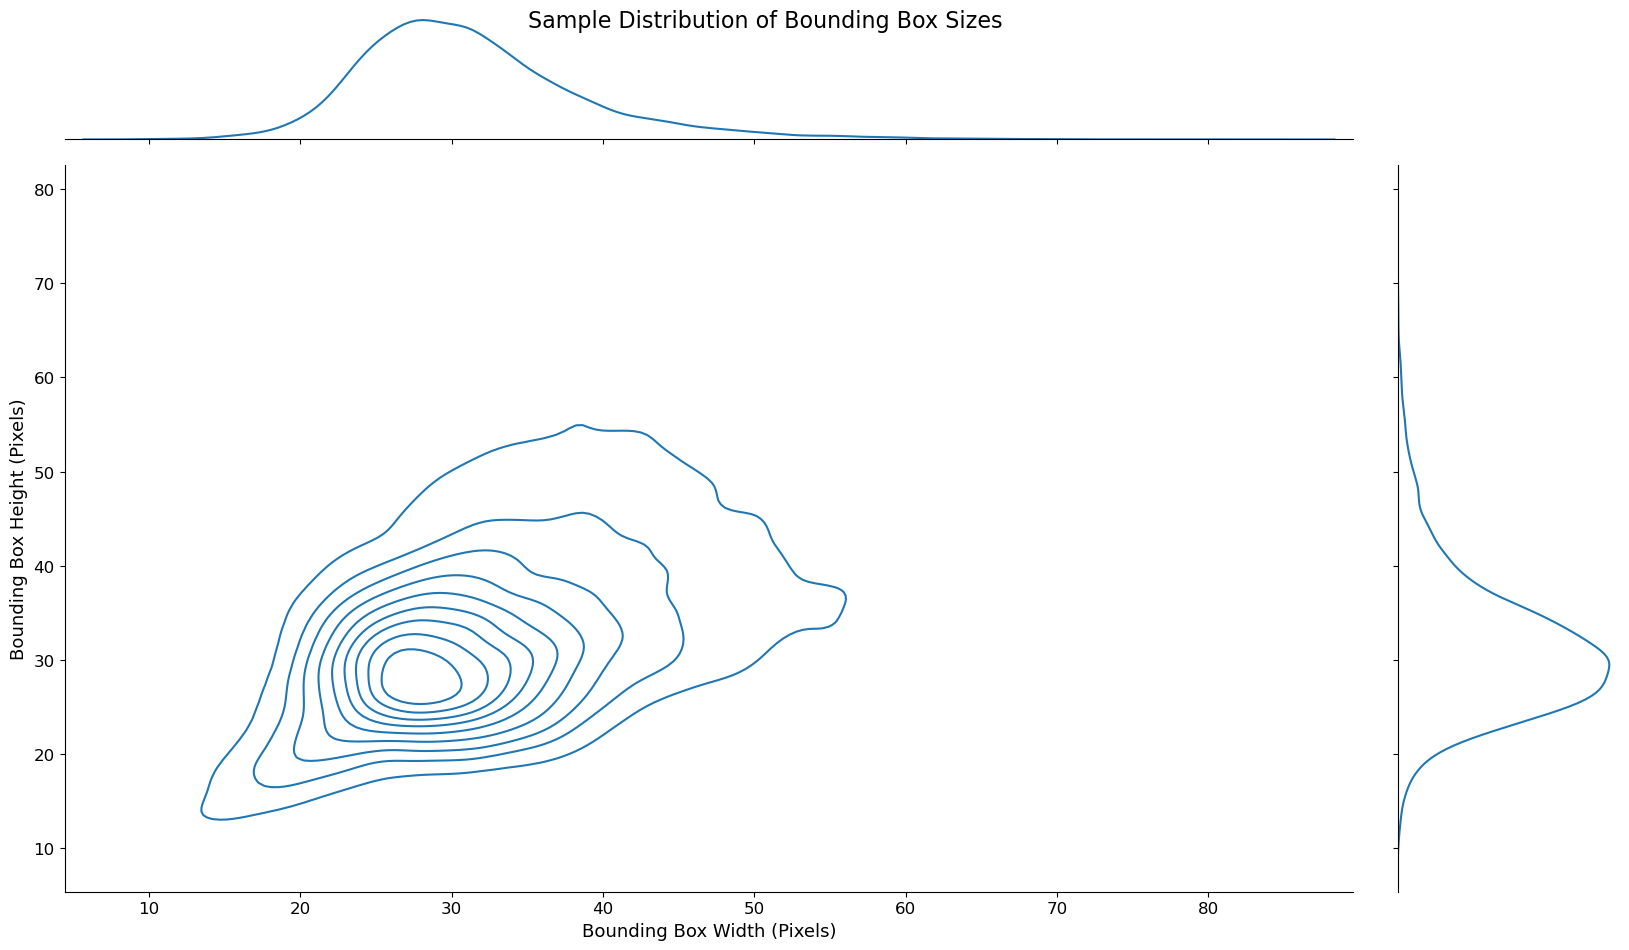

In [6]:
g = sns.jointplot(
    data=cropdimdf.sample(n=15_000, random_state=0),
    x="Nuclei_AreaShape_BoundingBoxDelta_X",
    y="Nuclei_AreaShape_BoundingBoxDelta_Y",
    kind="kde",
)
g.fig.set_size_inches(18, 10)
g.set_axis_labels(
    "Bounding Box Width (Pixels)", "Bounding Box Height (Pixels)", fontsize=13
)
g.fig.suptitle("Sample Distribution of Bounding Box Sizes", fontsize=16)

g.ax_joint.tick_params(axis="x", labelsize=12)
g.ax_joint.tick_params(axis="y", labelsize=12)

plt.savefig(nuclei_crop_figure_path / "nuclei_crop_distributions.png")
plt.show()